In [1]:
# General imports
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import statistics as s

# Own functions
from data_preparation import preprocessing_functions as preproc
from data_preparation import preprocessing_functions_for_final_runs as preproc_final

# Plots
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
qa_data_train = pd.read_csv('Data/Friends_data/Final_QA_datasets/qa_data_train.csv', sep='\t', index_col=0)
qa_data_tune = pd.read_csv('Data/Friends_data/Final_QA_datasets/qa_data_tune.csv', sep='\t', index_col=0)
qa_data_dev = pd.read_csv('Data/Friends_data/Final_QA_datasets/qa_data_dev.csv', sep='\t', index_col=0)
qa_data_test = pd.read_csv('Data/Friends_data/Final_QA_datasets/qa_data_test.csv', sep='\t', index_col=0)

X_train, Y_train, X_dev, Y_dev, Y_dev_original, X_test, Y_test, vocab, vocab_size, maxlen, tokenizer, number_of_labels = preproc_final.preprocessing(qa_data_train, qa_data_tune, qa_data_dev, qa_data_test, exclude=[5,6], multi_input=False, input_def='c')

# Accuracy and F1-score for DEV and TEST sets - average of 3 runs

In [4]:
dev1 = "predictions/CNN_bert_crowds/bert_crowds_dev1.npz"
dev2 = "predictions/CNN_bert_crowds/bert_crowds_dev2.npz"
dev3 = "predictions/CNN_bert_crowds/bert_crowds_dev3.npz"

test1 = "predictions/CNN_bert_crowds/bert_crowds_test1.npz"
test2 = "predictions/CNN_bert_crowds/bert_crowds_test2.npz"
test3 = "predictions/CNN_bert_crowds/bert_crowds_test3.npz"

In [5]:
predictions_dev_1 = np.load(dev1)['arr_0']
predictions_dev_2 = np.load(dev2)['arr_0']
predictions_dev_3 = np.load(dev3)['arr_0']

predictions_test_1 = np.load(test1)['arr_0']
predictions_test_2 = np.load(test2)['arr_0']
predictions_test_3 = np.load(test3)['arr_0']

In [6]:
acc_dev1 = accuracy_score(Y_dev_original, predictions_dev_1)
acc_dev2 = accuracy_score(Y_dev_original, predictions_dev_2)
acc_dev3 = accuracy_score(Y_dev_original, predictions_dev_3)

acc_test1 = accuracy_score(Y_test, predictions_test_1)
acc_test2 = accuracy_score(Y_test, predictions_test_2)
acc_test3 = accuracy_score(Y_test, predictions_test_3)

fsc_dev1 = f1_score(Y_dev_original, predictions_dev_1, average='macro')
fsc_dev2 = f1_score(Y_dev_original, predictions_dev_2, average='macro')
fsc_dev3 = f1_score(Y_dev_original, predictions_dev_3, average='macro')

fsc_test1 = f1_score(Y_test, predictions_test_1, average='macro')
fsc_test2 = f1_score(Y_test, predictions_test_2, average='macro')
fsc_test3 = f1_score(Y_test, predictions_test_3, average='macro')

In [7]:
average_dev_acc = (acc_dev1 + acc_dev2 + acc_dev3) / 3
average_test_acc = (acc_test1 + acc_test2 + acc_test3) / 3

average_dev_fsc = (fsc_dev1 + fsc_dev2 + fsc_dev3) / 3
average_test_fsc = (fsc_test1 + fsc_test2 + fsc_test3) / 3

In [8]:
print("DEV: \nAverage accuracy: {} with standard deviation: {}".format(np.round(average_dev_acc*100,3), np.round(s.stdev([acc_dev1,acc_dev2,acc_dev3])*100,3)))
print("Average f1-score: {} with standard deviation: {}".format(np.round(average_dev_fsc*100,3), np.round(s.stdev([fsc_dev1,fsc_dev2,fsc_dev3])*100,3)))
print()
print("TEST: \nAverage accuracy: {} with standard deviation: {}".format(np.round(average_test_acc*100,3), np.round(s.stdev([acc_test1,acc_test2,acc_test3])*100,3)))
print("Average f1-score: {} with standard deviation: {}".format(np.round(average_test_fsc*100,3), np.round(s.stdev([fsc_test1,fsc_test2,fsc_test3])*100,3)))


DEV: 
Average accuracy: 63.463 with standard deviation: 0.195
Average f1-score: 55.003 with standard deviation: 2.29

TEST: 
Average accuracy: 60.315 with standard deviation: 1.373
Average f1-score: 47.886 with standard deviation: 1.385


## Class-wise F1-score for DEV set

In [9]:
print("DEV:")
print(classification_report(Y_dev_original, predictions_dev_1))
print(classification_report(Y_dev_original, predictions_dev_2))
print(classification_report(Y_dev_original, predictions_dev_3))

DEV:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       291
           1       0.58      0.46      0.52       153
           2       0.50      0.21      0.30        14
           3       0.60      0.50      0.55       135

    accuracy                           0.64       593
   macro avg       0.59      0.50      0.52       593
weighted avg       0.63      0.64      0.62       593

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       291
           1       0.58      0.55      0.56       153
           2       0.45      0.36      0.40        14
           3       0.57      0.58      0.57       135

    accuracy                           0.64       593
   macro avg       0.57      0.55      0.56       593
weighted avg       0.63      0.64      0.63       593

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       291
           1    

In [10]:
f1_1 = f1_score(Y_dev_original,predictions_dev_1,average=None)
f1_2 = f1_score(Y_dev_original,predictions_dev_2,average=None)
f1_3 = f1_score(Y_dev_original,predictions_dev_3,average=None)

In [11]:
print(f1_1)
print(f1_2)
print(f1_3)

[0.73208723 0.51636364 0.3        0.54618474]
[0.71307301 0.56187291 0.4        0.57142857]
[0.72285251 0.54109589 0.46153846 0.53386454]


In [12]:
np.average(np.asarray((f1_1,f1_2,f1_3)),axis=0)

array([0.72267091, 0.53977748, 0.38717949, 0.55049262])

# Crowds - weights analysis

In [13]:
friends_train = pd.concat([qa_data_train, qa_data_tune])

friends_train_ann1 = np.delete(np.array([i-1 for i in friends_train['Annotation_1']]), 4678, axis=0)
friends_train_ann2 = np.delete(np.array([i-1 for i in friends_train['Annotation_2']]), 4678, axis=0)
friends_train_ann3 = np.delete(np.array([i-1 for i in friends_train['Annotation_3']]), 4678, axis=0)

friends_train_ann1_onehot = preproc.one_hot_encoder_with_missing_labels(friends_train_ann1, number_of_labels)
friends_train_ann2_onehot = preproc.one_hot_encoder_with_missing_labels(friends_train_ann2, number_of_labels)
friends_train_ann3_onehot = preproc.one_hot_encoder_with_missing_labels(friends_train_ann3, number_of_labels)

friends_anns_train = list([friends_train_ann1_onehot, friends_train_ann2_onehot, friends_train_ann3_onehot])
friends_num_ann = len(friends_anns_train)
friends_anns_train = np.asarray(friends_anns_train)
friends_anns_train = np.transpose(friends_anns_train,(1,2,0))
friends_data_size = len(friends_train)

In [14]:
crowds_weights = np.load('predictions/bert_crowds_weights.npz')
crowds_model_weights = np.array((crowds_weights['arr_0'],crowds_weights['arr_1'],crowds_weights['arr_2'],crowds_weights['arr_3']))

In [15]:
label_1 = crowds_weights['arr_0']
label_2 = crowds_weights['arr_1']
label_3 = crowds_weights['arr_2']
label_4 = crowds_weights['arr_3']

In [16]:
mat_1 = np.asarray((label_1[:,0],label_2[:,0],label_3[:,0],label_4[:,0]))
mat_2 = np.asarray((label_1[:,1],label_2[:,1],label_3[:,1],label_4[:,1]))
mat_3 = np.asarray((label_1[:,2],label_2[:,2],label_3[:,2],label_4[:,2]))

mat_1 = (np.transpose(mat_1) + np.abs(mat_1.min()))
mat_1 = mat_1 / mat_1.max()

mat_2 = (np.transpose(mat_2) + np.abs(mat_2.min()))
mat_2 = mat_2 / mat_2.max()

mat_3 = (np.transpose(mat_3) + np.abs(mat_3.min()))
mat_3 = mat_3 / mat_3.max()

In [17]:
def plot_weights(mat):
    ax = sn.heatmap(mat, fmt='.0f', cmap="YlGnBu", xticklabels=[1,2,3,4], yticklabels=[1,2,3,4])
    bottom, top = ax.get_ylim()
    plt.yticks(rotation=0)
    plt.xlabel('Estimated weights')
    plt.ylabel('True labels')
    plt.show()

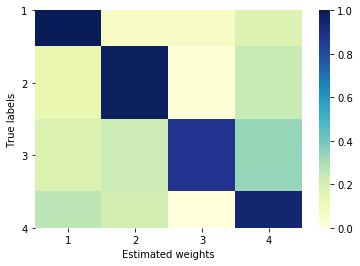

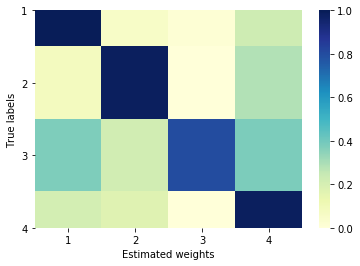

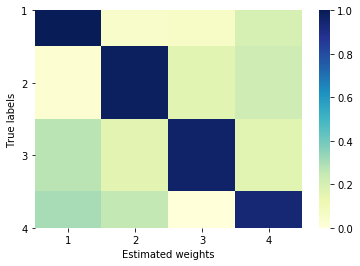

In [18]:
plot_weights(mat_1)
plot_weights(mat_2)
plot_weights(mat_3)

In [19]:
print(mat_1)
print(mat_2)
print(mat_3)

[[1.         0.05774285 0.05904024 0.18346491]
 [0.13719626 0.97722757 0.01090449 0.24542259]
 [0.18584691 0.23321277 0.88363576 0.33270076]
 [0.26900426 0.21097896 0.         0.9522772 ]]
[[1.         0.05484784 0.0190535  0.22905977]
 [0.08216262 0.9860981  0.00147686 0.28718606]
 [0.37782368 0.21556683 0.80413115 0.3798092 ]
 [0.2129817  0.17471638 0.         0.98475623]]
[[1.         0.04753169 0.0554295  0.19950052]
 [0.02632921 0.9822643  0.16072914 0.22997676]
 [0.2725359  0.15989187 0.9617427  0.16333903]
 [0.30497143 0.25472754 0.         0.938791  ]]
